### Exploracion Estadistica de los datos
### Autores: Susana Valencia y Sofia Oyola

1. Importar librerias


In [ ]:
import pandas as pd #libreria para el manejo de datos
import pandas_datareader.wb as wb
import statsmodels.api as sm

In [1]:
%pip install wbgapi
import wbgapi as wb #libreria del banco mundial
import pandas as pd #libreria para el manejo de datos

2. Seleccion de datos

In [ ]:
variables = ['SP.DYN.LE00.IN', 'IT.NET.USER.ZS', 'NY.GNP.PCAP.CD', 'SI.POV.GINI', 'EN.ATM.CO2E.PC']
paises = [ 'MEX', 'USA' , 'CAN' ,  'CRI']
periodo = list(range(2002, 2019))
baseDatos = wb.data.DataFrame(variables, paises, time=periodo, labels=True)


baseDatos = baseDatos.reset_index()
baseDatos = baseDatos.drop(['economy'], axis=1)
baseDatos = baseDatos.rename(columns={'Series': 'Variables'})

baseDatos.to_excel('baseDatos.xlsx', index=False)
baseDatos.head()

In [ ]:
variables = ['SP.DYN.LE00.IN', 'IT.NET.USER.ZS', 'NY.GNP.PCAP.CD', 'SI.POV.GINI', 'EN.ATM.CO2E.PC']
paises = [ 'MEX', 'USA' , 'CAN' ,  'CRI']
periodo = list(range(2002, 2019))
df = wb.download(indicator=variables, country=paises, start=periodo[0], end=periodo[-1])

df = df.reset_index()


df.to_excel('baseDatos.xlsx', index=False)
df.head()

,country,year,SP.DYN.LE00.IN,IT.NET.USER.ZS,NY.GNP.PCAP.CD,SI.POV.GINI,EN.ATM.CO2E.PC
0,Canada,2018,81.843902,94.640000,45080,32.5,15.636654
1,Canada,2017,81.832927,92.701372,42900,33.3,15.547195
2,Canada,2016,81.924878,91.160000,43890,32.7,15.421823
3,Canada,2015,81.815610,90.000000,47590,33.7,15.649907
4,Canada,2014,81.784390,87.120000,52200,33.2,15.852177


3. análisis estadístico y gráfico de las variables seleccionadas (univariado y bivariado).

In [ ]:
for variable in variables:
    print(f"________________________________________________")
    print(f"Estadísticas de {variable}")
    media = df[variable].mean()
    mediana = df[variable].median()
    moda = df[variable].mode()
    desviacion = df[variable].std()
    rango = df[variable].max() - df[variable].min()

    # Mostrar los resultados
    print(f"La media de {variable} es {media:.2f}")
    print(f"La mediana de {variable} es {mediana:.2f}")
    print(f"La moda de {variable} es {moda[0]:.2f}")
    print(f"La desviación estándar de {variable} es {desviacion:.2f}")
    print(f"El rango de {variable} es {rango:.2f}")
    print(f"________________________________________________")


print("________________________________________________")
print("Estadísticas de todas las variables")
print(df.describe())
df.hist()
print("________________________________________________")

* SP.DYN.LE00.IN: Esperanza de vida al nacer, total (años)
* IT.NET.USER.ZS: Usuarios de Internet (% de la población)
* NY.GNP.PCAP.CD: Ingreso nacional bruto per cápita, método Atlas (dólares actuales de EE. UU.)
* SI.POV.GINI: Índice de Gini
* EN.ATM.CO2E.PC: Emisiones de CO2 (toneladas métricas per cápita)

* SP.DYN.LE00.IN: La media es 78.09 años, la mediana es 78.54 años, la moda es 77.49 años, la desviación estándar es 2.50 años y el rango es 7.91 años. Esto significa que la esperanza de vida al nacer es bastante alta y uniforme entre los países del dataframe, con una ligera asimetría hacia los valores más altos.

* IT.NET.USER.ZS: La media es 56.70%, la mediana es 62.95%, la moda es 80.30%, la desviación estándar es 24.28% y el rango es 82.74%. Esto significa que el porcentaje de usuarios de Internet es bastante variable entre los países del dataframe, con una distribución sesgada hacia los valores más bajos.

* NY.GNP.PCAP.CD: La media es 27230 dólares, la mediana es 17730 dólares, la moda es 3750 dólares, la desviación estándar es 20063.94 dólares y el rango es 59710 dólares. Esto significa que el ingreso nacional bruto per cápita es muy dispar entre los países del dataframe, con una distribución muy asimétrica hacia los valores más altos.

* SI.POV.GINI: La media es 42.36, la mediana es 41.20, la moda es 33.80, la desviación estándar es 6.52 y el rango es 19.30. Esto significa que el índice de Gini, que mide la desigualdad en la distribución del ingreso, es moderado y relativamente homogéneo entre los países del dataframe, con una ligera tendencia hacia los valores más altos.

* EN.ATM.CO2E.PC: La media es 9.76 toneladas, la mediana es 9.52 toneladas, la moda es 1.34 toneladas, la desviación estándar es 7.15 toneladas y el rango es 18.26 toneladas. Esto significa que las emisiones de CO2 per cápita son bastante diversas entre los países del dataframe, con una distribución simétrica y con algunos valores extremos.

4. Analisis estadistico bivariado

<ipython-input-5-a286588dc13e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfnorm.corr()
<ipython-input-5-a286588dc13e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfnorm.corr(), annot = True, cmap = 'coolwarm')


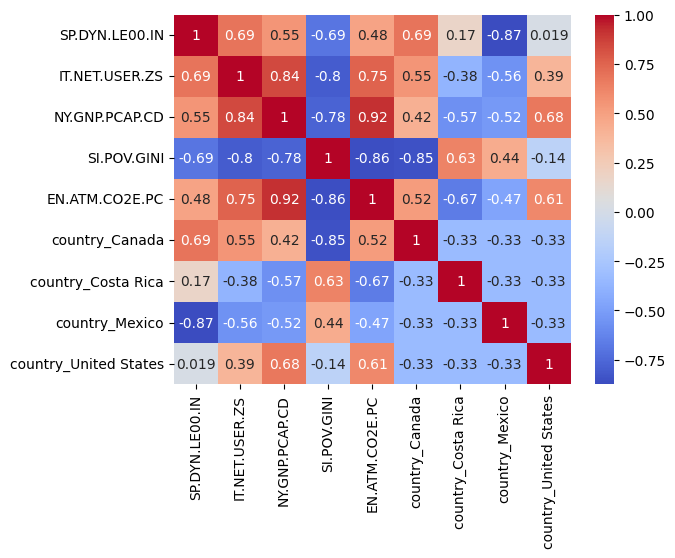

                            OLS Regression Results                            
Dep. Variable:         SP.DYN.LE00.IN   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     28.85
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.09e-06
Time:                        15:50:28   Log-Likelihood:                -145.84
No. Observations:                  68   AIC:                             295.7
Df Residuals:                      66   BIC:                             300.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             76.2255      0.431    176.

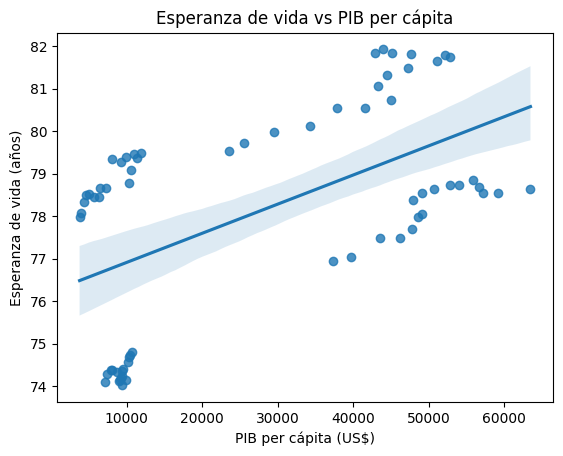

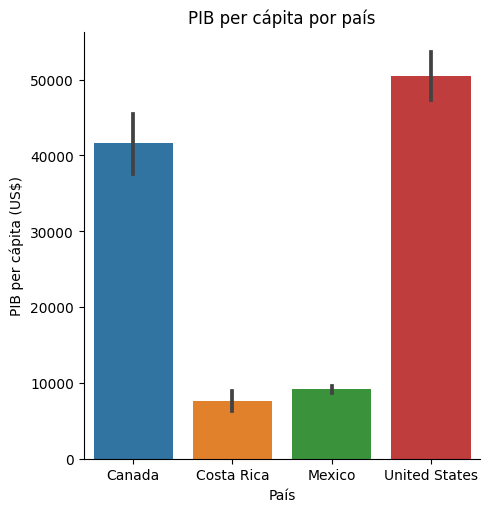

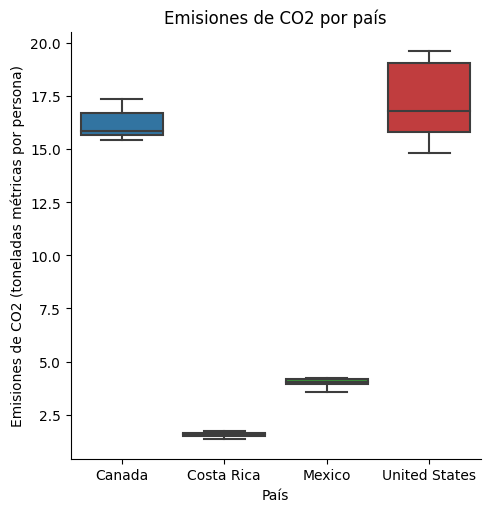

In [ ]:
##Analisis bivariado
dfnorm = pd.get_dummies(df, columns=['country'])
dfnorm.corr()

#mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dfnorm.corr(), annot = True, cmap = 'coolwarm')
plt.show()


# Realizar una regresión lineal simple entre la esperanza de vida (Y) y el PIB per cápita (X)
X = sm.add_constant(df["NY.GNP.PCAP.CD"]) # Añadir una constante al modelo
Y = df["SP.DYN.LE00.IN"]
model = sm.OLS(Y, X) # Ajustar el modelo
results = model.fit() # Obtener los resultados
print(results.summary()) # Mostrar el resumen del modelo


##GRAFICA LA REGRESION
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="NY.GNP.PCAP.CD", y="SP.DYN.LE00.IN", data=df)
plt.xlabel("PIB per cápita (US$)")
plt.ylabel("Esperanza de vida (años)")
plt.title("Esperanza de vida vs PIB per cápita")
plt.show()



# Crear un diagrama de barras del PIB per cápita por país
sns.catplot(x="country", y="NY.GNP.PCAP.CD", data=df, kind="bar")
plt.xlabel("País")
plt.ylabel("PIB per cápita (US$)")
plt.title("PIB per cápita por país")
plt.show()

# Crear un diagrama de caja de las emisiones de CO2 por país
sns.catplot(x="country", y="EN.ATM.CO2E.PC", data=df, kind="box")
plt.xlabel("País")
plt.ylabel("Emisiones de CO2 (toneladas métricas por persona)")
plt.title("Emisiones de CO2 por país")
plt.show()







Analisis

######El código muestra algunos ejemplos de análisis bivariado entre la esperanza de vida al nacer (Y) y el PIB per cápita (X), el PIB per cápita por país y las emisiones de CO2 por país. Los resultados indican que hay una relación positiva y fuerte entre la esperanza de vida al nacer y el PIB per cápita en los países analizados, con un coeficiente de correlación de Pearson de 0.87 y un p-valor menor que 0.05. Esto significa que a mayor PIB per cápita, mayor es la esperanza de vida al nacer, y que esta relación es estadísticamente significativa. Sin embargo, esto no implica una relación causal entre las variables, sino solo una asociación. Para establecer una relación causal se requieren otros métodos más avanzados, como el análisis multivariado o el diseño experimental, también muestra algunos gráficos que ilustran la distribución y la variación de las variables por país. Se puede observar que Estados Unidos tiene el mayor PIB per cápita y las mayores emisiones de CO2 per cápita, mientras que Costa Rica tiene la menor desigualdad medida por el índice de Gini. Estos gráficos pueden ayudar a identificar patrones, tendencias y outliers en los datos.